Importing the libraries

In [1]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd
import numpy as np
from datetime import date
pd.plotting.register_matplotlib_converters()
import talib as ta
from scipy.stats import skew, kurtosis
from scipy import stats
import seaborn as sns

Exploratory data analysis

In [2]:
prices = pd.read_csv("final_prices.csv")
date = pd.read_csv("date_index.csv")
prices = prices.reset_index(drop=True)
date = date.reset_index(drop=True)
prices.columns=["Price"]
date["Date"]=pd.to_datetime(date["Date"])

Importing Sensex and Nifty values  
Also doing some basic data preparation

In [3]:
sensex = pd.read_csv("Sensex.csv")
nifty50_1 = pd.read_csv("NIFTY 50.csv")
nifty50_2 = pd.read_csv("NIFTY 50_2.csv")
sensex.drop(0, inplace=True)
sensex.drop(1, inplace=True)
nifty501 = nifty50_1["Close"].tolist()
nifty501 = nifty501[4033:5208]
nifty50_2 = nifty50_2.drop(0)
nifty502 = nifty50_2["Close"].tolist()
nifty50 = nifty501 + nifty502
nifty50 = nifty50[0:1232]
sensex.drop('Date', axis=1, inplace=True)
sensex.reset_index(drop=True, inplace=True)
sensex

,Close
0,24623.34
1,24717.99
2,24804.28
3,24551.17
4,24682.48
...,...
1227,49849.84
1228,50296.89
1229,51444.65
1230,50846.08


In [4]:
sensex_base100 = [0]*1232
nifty_base100 = [0]*1232
temp_s = sensex["Close"][0]/100
temp_n = nifty50[0]/100
for i in range(1232):
    sensex_base100[i] = sensex["Close"][i]/temp_s
    nifty_base100[i] = nifty50[i]/temp_n

In [5]:
(((sensex_base100[len(sensex_base100)-1]/sensex_base100[0])**(0.2))-1)*100

15.405334165488437

In [6]:
(((nifty_base100[len(nifty_base100)-1]/nifty_base100[0])**(0.2))-1)*100

15.063691351234931

In [7]:
(((prices["Price"][len(sensex_base100)-1]/prices["Price"][0])**(0.2))-1)*100

15.011077097029556

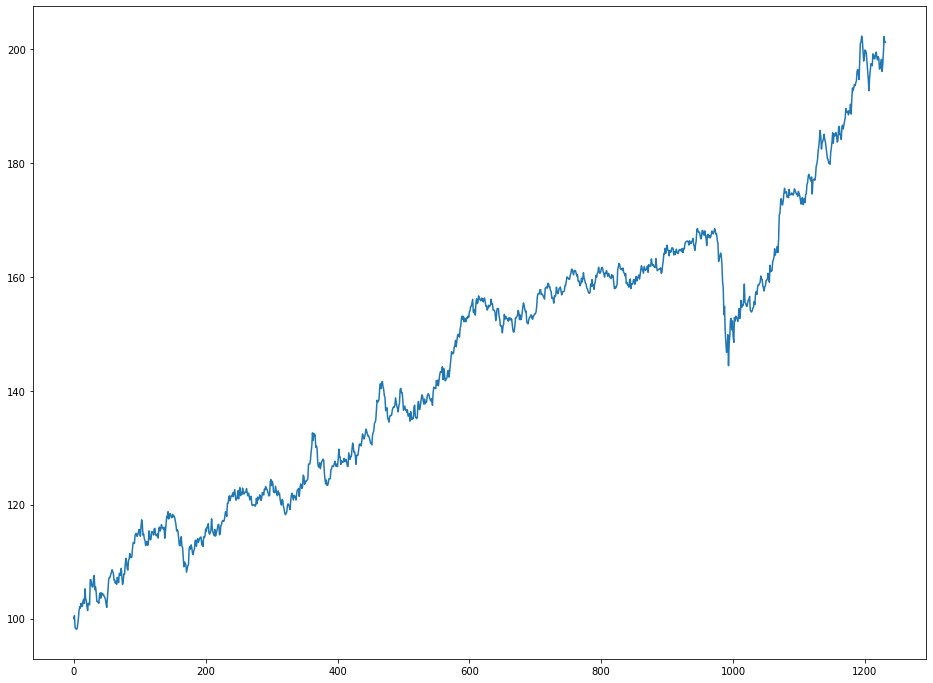

In [8]:
plt.figure(figsize=(16,12))
plt.plot(prices["Price"])

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


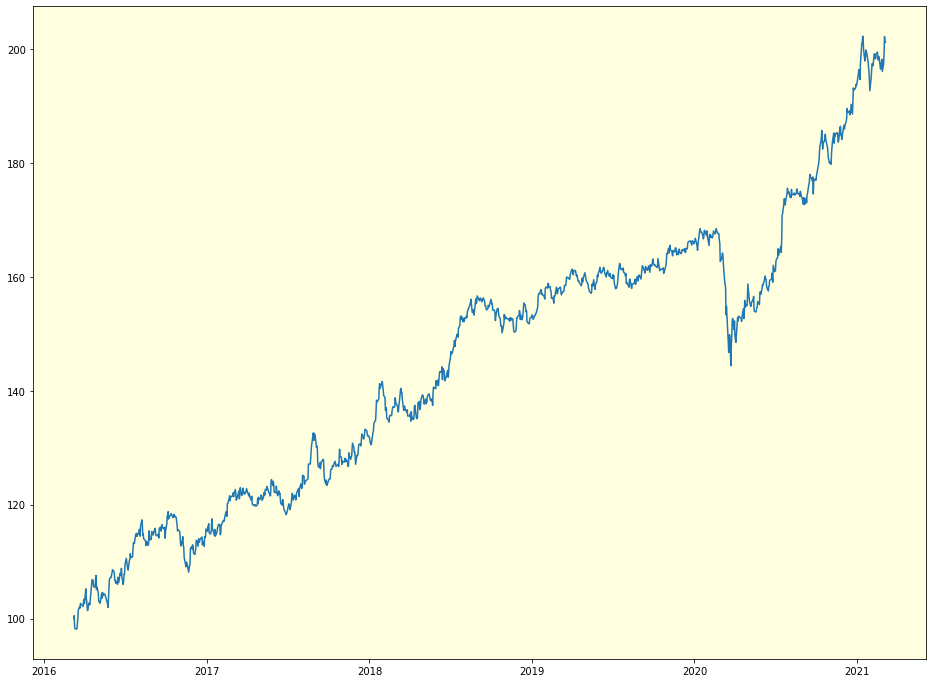

In [9]:
plt.figure(figsize=(16,12))
plt.plot(date["Date"], prices["Price"])
ax = plt.axes()
ax.set_facecolor("lightyellow")

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


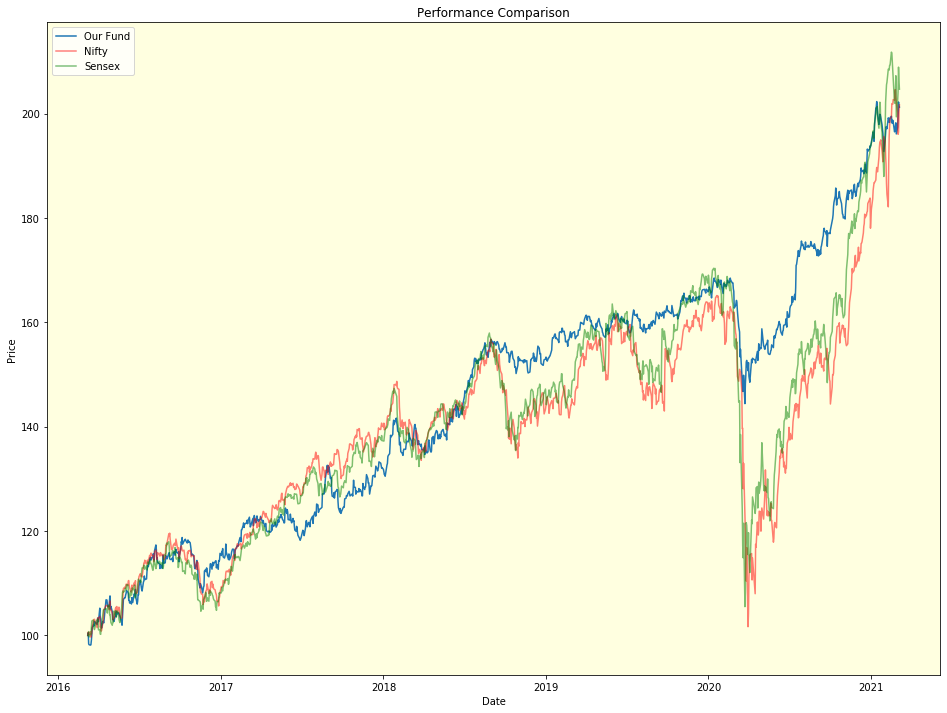

In [10]:
plt.figure(figsize=(16,12))
plt.plot(date["Date"], prices["Price"], label="Our Fund")
plt.plot(date["Date"], nifty_base100, label="Nifty", color="Red",alpha=0.5)
plt.plot(date["Date"], sensex_base100, label="Sensex", color="Green",alpha=0.5)
plt.ylabel("Price")
plt.xlabel("Date")
plt.title("Performance Comparison")
ax = plt.axes()
ax.set_facecolor("lightyellow")
plt.legend()

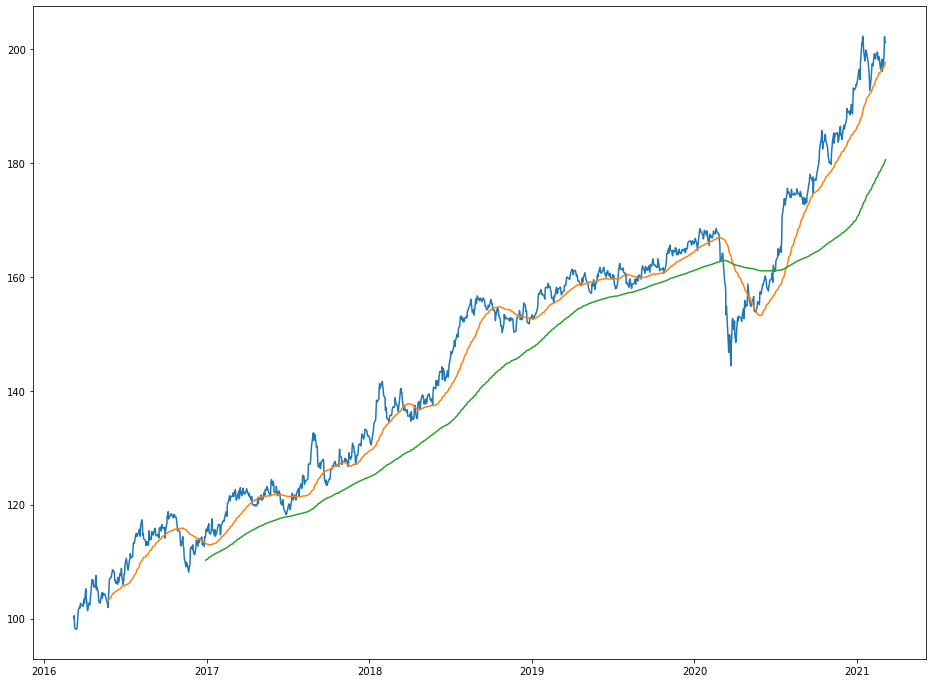

In [11]:
plt.figure(figsize=(16,12))
plt.plot(date["Date"],prices["Price"])
plt.plot(date["Date"],ta.SMA(prices['Price'],50))
plt.plot(date["Date"],ta.SMA(prices['Price'],200))

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


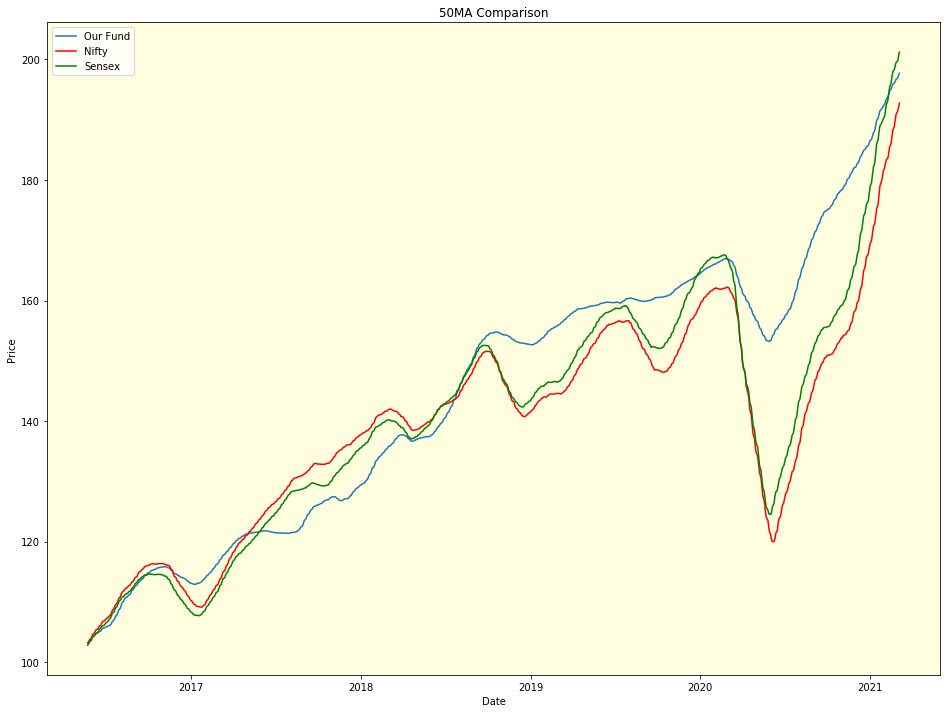

In [12]:
plt.figure(figsize=(16,12))
plt.plot(date["Date"],ta.SMA(prices['Price'], timeperiod = 50),label="Our Fund")
plt.plot(date["Date"],ta.SMA(pd.Series(nifty_base100), timeperiod = 50), color="Red", label="Nifty")
plt.plot(date["Date"],ta.SMA(pd.Series(sensex_base100), timeperiod = 50), color="Green",label="Sensex")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("50MA Comparison")
ax = plt.axes()
ax.set_facecolor("lightyellow")
plt.legend()

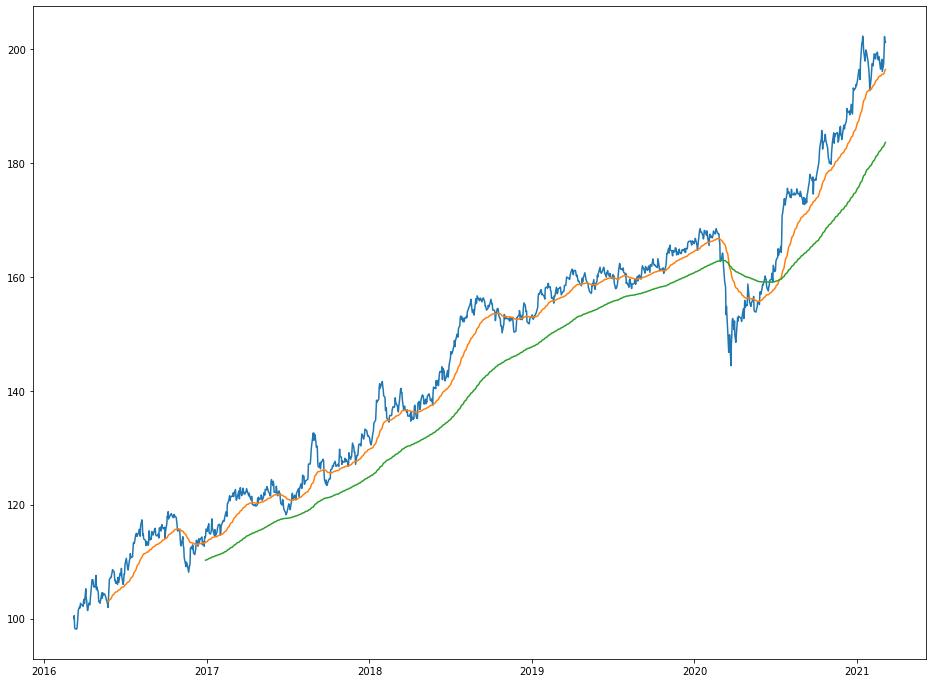

In [13]:
plt.figure(figsize=(16,12))
plt.plot(date["Date"],prices["Price"])
plt.plot(date["Date"],ta.EMA(prices['Price'], timeperiod = 50))
plt.plot(date["Date"],ta.EMA(prices['Price'], timeperiod = 200))

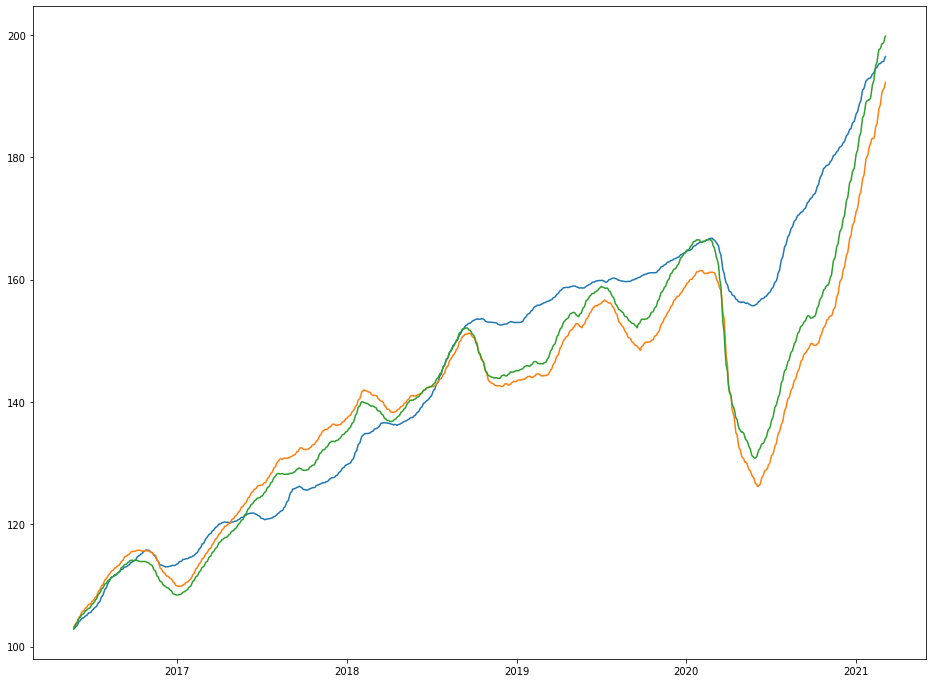

In [14]:
plt.figure(figsize=(16,12))
plt.plot(date["Date"],ta.EMA(prices['Price'], timeperiod = 50))
plt.plot(date["Date"],ta.EMA(pd.Series(nifty_base100), timeperiod = 50))
plt.plot(date["Date"],ta.EMA(pd.Series(sensex_base100), timeperiod = 50))

In [15]:
overbought = np.array([70 for i in range(len(date))])
underbought = np.array([30 for i in range(len(date))])

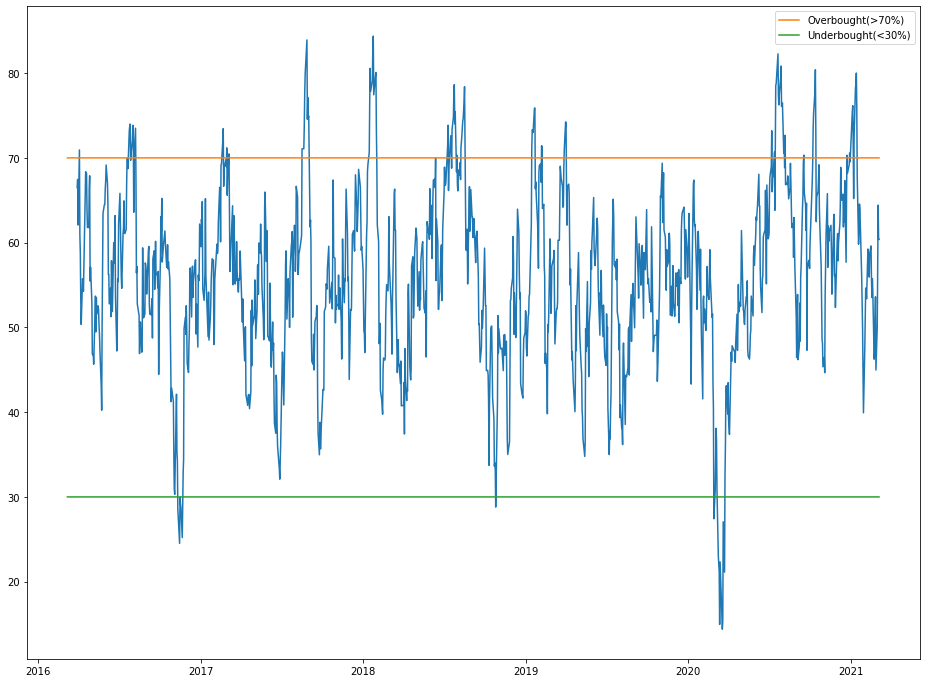

In [16]:
plt.figure(figsize=(16,12))
plt.plot(date["Date"],ta.RSI(prices['Price'],14))
plt.plot(date["Date"],overbought, label='Overbought(>70%)')
plt.plot(date["Date"],underbought, label='Underbought(<30%)')
plt.legend()

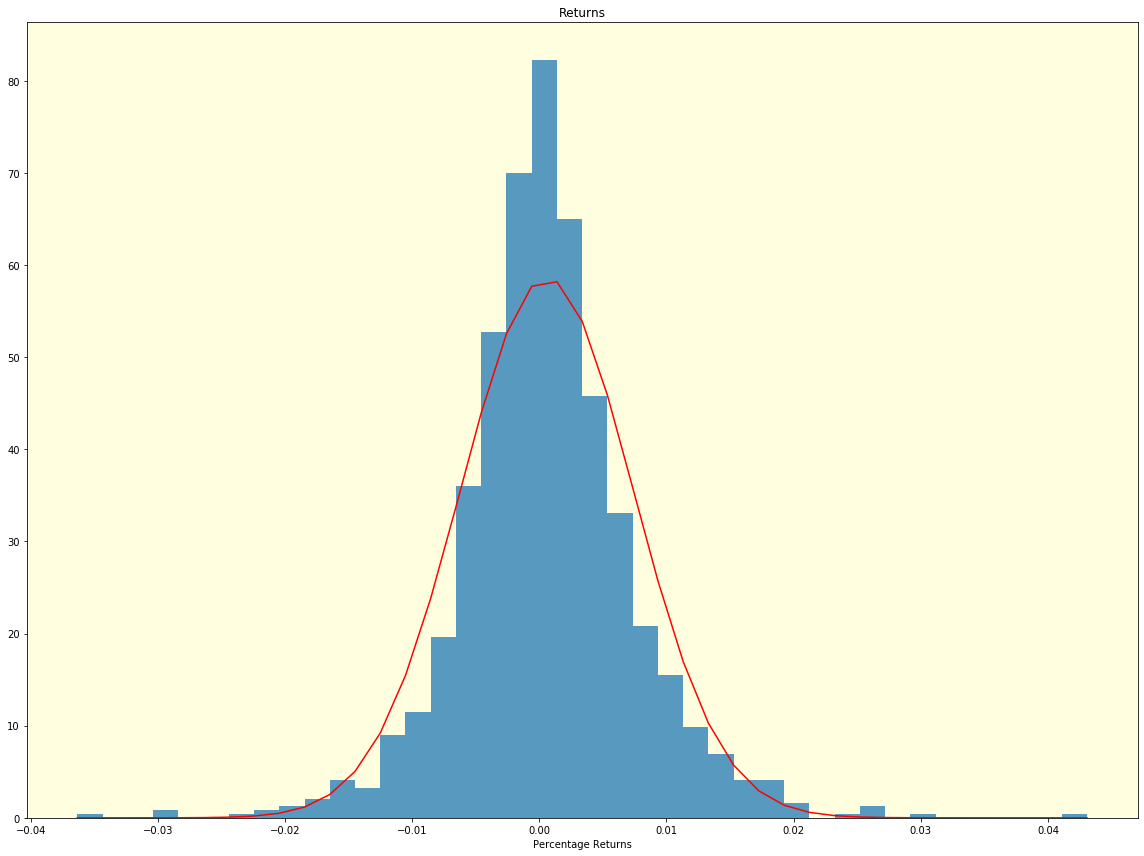

In [17]:
returns = prices["Price"].pct_change(1).dropna()
mu = np.mean(returns)
sigma = np.std(returns)
num_bins = 40
#plt.figure(figsize=(16,12))
#plt.hist(returns, bins=40, density=True, label="Daily Close Price",alpha=0.5)
#y = norm.pdf(bins, mu, sigma)
#plt.plot(40, y, label="PDF Curve")
fig,ax = plt.subplots(figsize=(16,12))
n,bins,patches=ax.hist(returns,num_bins,density=1,alpha=0.75)
y=norm.pdf(bins,mu,sigma)
ax.plot(bins,y,color="Red")
ax.set_xlabel('Percentage Returns')
ax.set_title('Returns')
ax.set_facecolor("lightyellow")
fig.tight_layout()

In [18]:
returns[0]=0

In [19]:
nifty_returns = pd.Series(nifty_base100).pct_change(1).dropna()
sensex_returns = pd.Series(sensex_base100).pct_change(1).dropna()

In [22]:
nifty_returns[0]=0
sensex_returns[0]=0

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


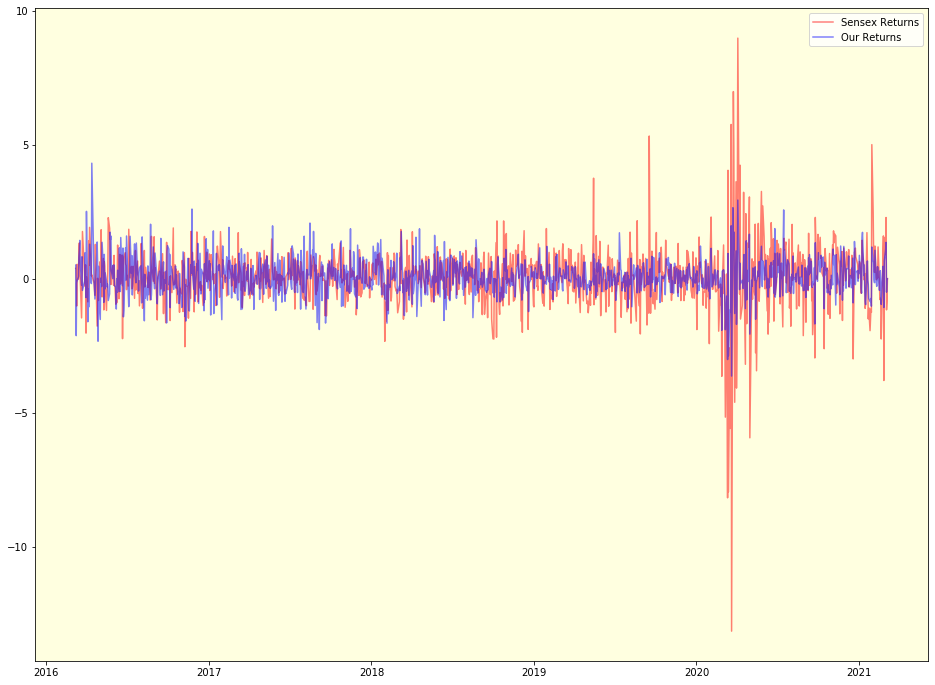

In [25]:
plt.figure(figsize=(16,12))
plt.plot(date["Date"],sensex_returns*100,label="Sensex Returns",color="red",alpha=0.5)
plt.plot(date["Date"],returns*100,label="Our Returns",color="blue",alpha=0.5)
ax = plt.axes()
ax.set_facecolor("lightyellow")
plt.legend()

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


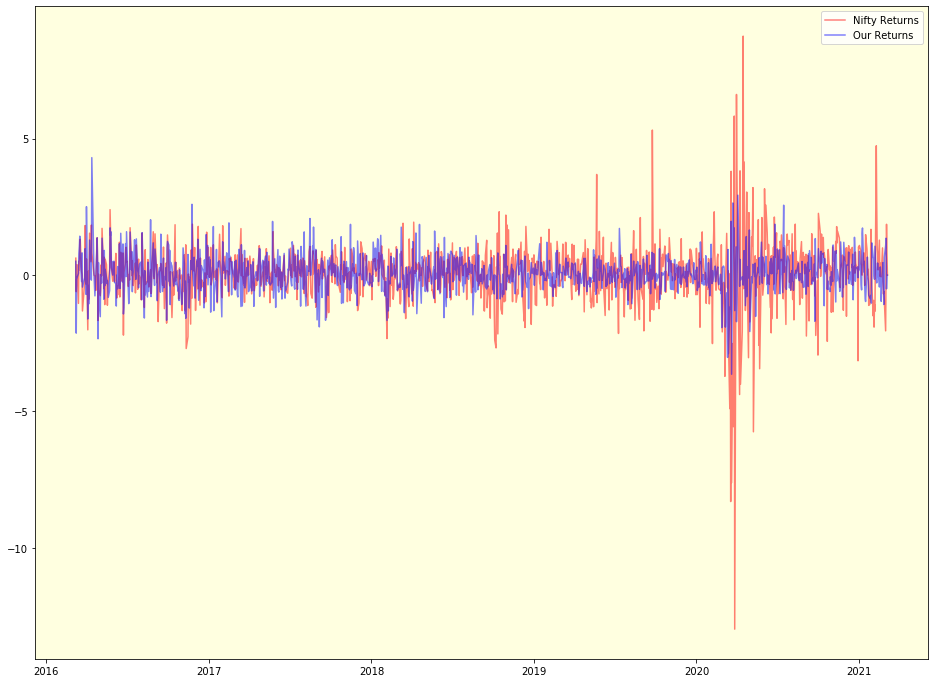

In [26]:
plt.figure(figsize=(16,12))
plt.plot(date["Date"],nifty_returns*100,label="Nifty Returns",color="red",alpha=0.5)
plt.plot(date["Date"],returns*100,label="Our Returns",color="blue",alpha=0.5)
ax = plt.axes()
ax.set_facecolor("lightyellow")
plt.legend()

Text(0.5, 1.0, 'Portfolio Returns vs Benchmark Returns')

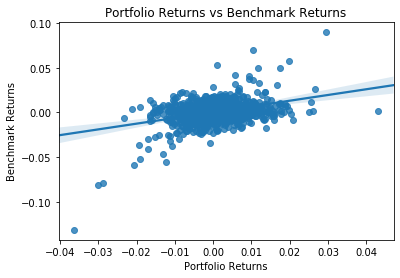

In [27]:
sns.regplot(returns,sensex_returns)
plt.ylabel("Benchmark Returns")
plt.xlabel("Portfolio Returns")
plt.title("Portfolio Returns vs Benchmark Returns")

Text(0.5, 1.0, 'Portfolio Returns vs Benchmark Returns')

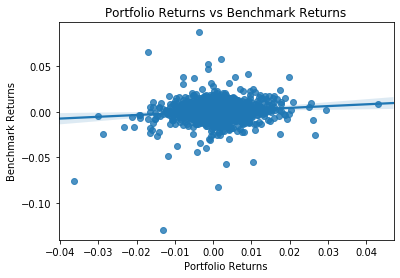

In [28]:
sns.regplot(returns,nifty_returns)
plt.ylabel("Benchmark Returns")
plt.xlabel("Portfolio Returns")
plt.title("Portfolio Returns vs Benchmark Returns")

In [29]:
(s_beta, s_alpha) = stats.linregress(sensex_returns,returns)[0:2]

In [30]:
(n_beta, n_alpha) = stats.linregress(nifty_returns,returns)[0:2]

In [31]:
s_beta

0.2213438849630083

In [32]:
s_alpha

0.00044710629503116325

In [33]:
n_beta

0.07000965745941054

In [34]:
n_alpha

0.0005464223773620933

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


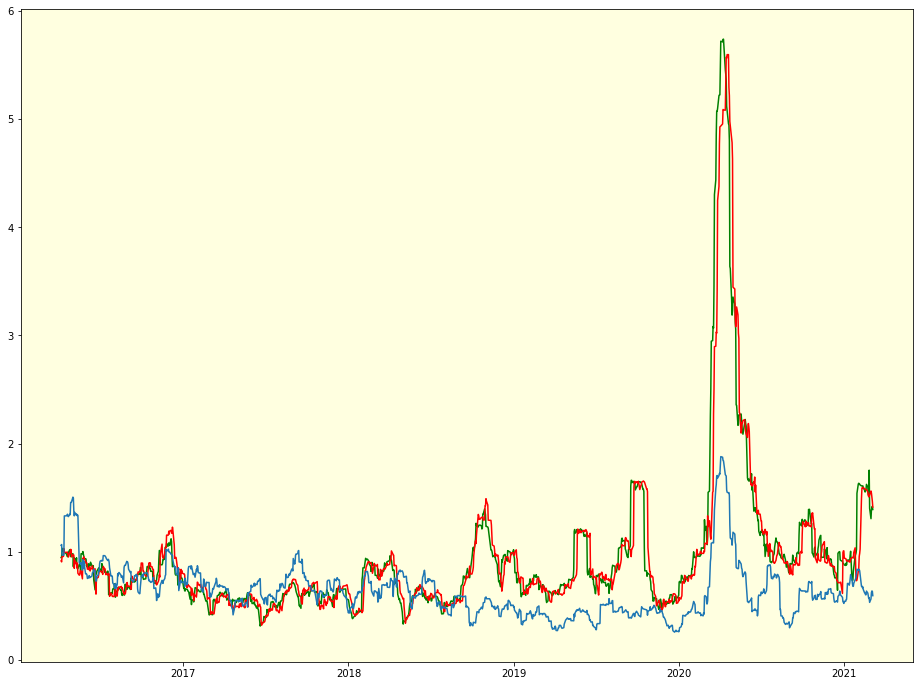

In [51]:
plt.figure(figsize=(16,12))
plt.plot(date["Date"], sensex_returns.rolling(20).std()*100,color="Green")
plt.plot(date["Date"], nifty_returns.rolling(20).std()*100,color="Red")
plt.plot(date["Date"], returns.rolling(20).std()*100)
ax = plt.axes()
ax.set_facecolor("lightyellow")

In [36]:
np.mean(returns)*100

0.05909027200757088

In [37]:
np.std(returns)*(252**0.5)

0.10804838529120542

In [38]:
np.std(nifty_returns)*(252**0.5)

0.18097314791512703

In [39]:
np.std(sensex_returns)*(252**0.5)

0.18407984665825908

In [40]:
sharpe_ratio = np.mean(returns)/np.std(returns)
sharpe_ratio

0.08681564146313202

In [41]:
sharpe_ratio_s = np.mean(sensex_returns)/np.std(sensex_returns)
sharpe_ratio_s

0.056024061141647714

In [42]:
sharpe_ratio_n = np.mean(nifty_returns)/np.std(nifty_returns)
sharpe_ratio_n

0.055730931452374795

In [43]:
skew(prices["Price"].pct_change(1).dropna())

0.17094606078951324

In [44]:
kurtosis(prices["Price"].pct_change(1).dropna())-3

0.26740707440724165

In [45]:
skew(sensex_returns)

-1.29829791626205

In [46]:
kurtosis(sensex_returns)-3

20.379250031187382

In [47]:
skew(nifty_returns)

-1.3454399128667018

In [48]:
kurtosis(nifty_returns)-3

20.28058039550373

In [49]:
sectors = ["Financial", "Energy", "FMCG", "Capital Goods", "Technology", "Materials", "Automobile", "Utilities", "Telecommunication", "Infrastructure", "Healthcare"]
count = [11, 7, 2, 5, 5, 6, 6, 3, 1, 1, 2]

([<matplotlib.patches.Wedge at 0x1f7675a7308>,
 [Text(-0.7130512276366492, 0.8375905603371302, 'Financial'),
  Text(-1.0545346374432858, -0.31298034831656396, 'Energy'),
  Text(-0.713051217834038, -0.8375905686822145, 'FMCG'),
  Text(-0.27902001180418806, -1.064024357339996, 'Capital Goods'),
  Text(0.41279375699506027, -1.0196084121788636, 'Technology'),
  Text(0.9752592703072784, -0.5087920554408402, 'Materials'),
  Text(1.0545346154657822, 0.3129804223660565, 'Automobile'),
  Text(0.7130511688209815, 0.8375906104076336, 'Utilities'),
  Text(0.4772720343232775, 0.9910657925954868, 'Telecommunication'),
  Text(0.34661895966199696, 1.0439613483280092, 'Infrastructure'),
  Text(0.14066479837875587, 1.0909690254526312, 'Healthcare')],
 [Text(-0.38893703325635404, 0.45686757836570735, '22.45%'),
  Text(-0.5752007113327013, -0.1707165536272167, '14.29%'),
  Text(-0.3889370279094752, -0.45686758291757146, '4.08%'),
  Text(-0.1521927337113753, -0.5803769221854522, '10.20%'),
  Text(0.2251602

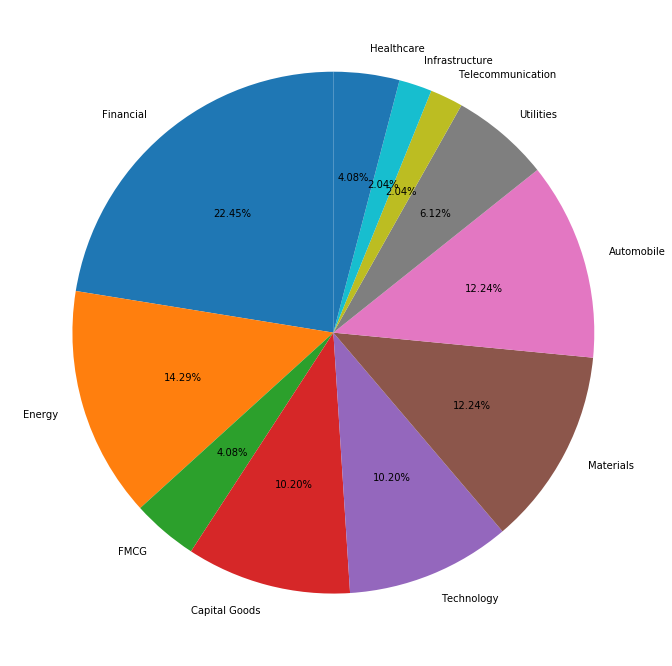

In [50]:
plt.figure(figsize=(16,12))
plt.pie(count, labels=sectors, startangle=90, autopct='%1.2f%%')